# **Лабораторная работа №3:**
Разрешается пользоваться библиотеками tensorflow/keras/pytorch и numpy.  Классифицируем ЭКГ. Требуется разработать и обучить три модели: обычную рекуррентную сеть, LSTM и GRU. Результаты сравнить, так же как и в прошлой работе - вывести графики с динамикой обучения, дать объяснение сравнительного превосходства той или иной архитектуры. Сравнить скорости обучения разных архитектур. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM, Flatten, GRU
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DL/mitbih_train.csv', header=None)
test_df = pd.read_csv('/content/drive/MyDrive/DL/mitbih_test.csv', header=None)

In [ ]:
X_train = train_df.iloc[:, :-1].values
X_test = test_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
y_test = test_df.iloc[:, -1].values

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Обычную рекуррентная сеть**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [ ]:
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size = 128)

Epoch 1/10
685/685 [==============================] - 9s 13ms/step - loss: 0.1202 - accuracy: 0.9666 - val_loss: 0.1066 - val_accuracy: 0.9704
Epoch 2/10
685/685 [==============================] - 6s 8ms/step - loss: 0.1192 - accuracy: 0.9661 - val_loss: 0.1055 - val_accuracy: 0.9698
Epoch 3/10
685/685 [==============================] - 8s 12ms/step - loss: 0.1157 - accuracy: 0.9670 - val_loss: 0.0997 - val_accuracy: 0.9719
Epoch 4/10
685/685 [==============================] - 5s 7ms/step - loss: 0.1139 - accuracy: 0.9675 - val_loss: 0.0985 - val_accuracy: 0.9727
Epoch 5/10
685/685 [==============================] - 5s 7ms/step - loss: 0.1146 - accuracy: 0.9671 - val_loss: 0.0982 - val_accuracy: 0.9733
Epoch 6/10
685/685 [==============================] - 4s 6ms/step - loss: 0.1088 - accuracy: 0.9686 - val_loss: 0.0976 - val_accuracy: 0.9725
Epoch 7/10
685/685 [==============================] - 4s 5ms/step - loss: 0.1071 - accuracy: 0.9693 - val_loss: 0.0975 - val_accuracy: 0.9740
Epoc

In [ ]:
model.save('my_model_SIMPLE.h5')

score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

685/685 [==============================] - 2s 3ms/step - loss: 0.1079 - accuracy: 0.9690
Test loss: 0.10791812092065811
Test accuracy: 0.9689841270446777


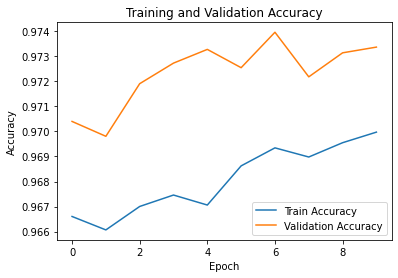

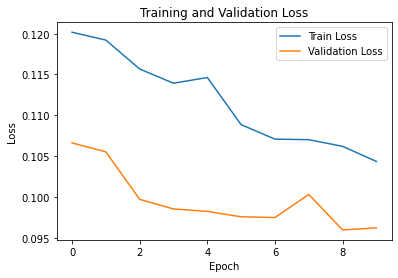

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Если взглянуть на графики, то можно подумать, что модель имеет явное переобучение, но потом, если более детально посмотерть на график, то мы увидим, что разница между значениями очень мало и поэтому можно сказать что модель очень хорошо будет предсказывать значения и чуть чуть склонна к переобучению.

## **LSTM**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [ ]:
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


685/685 [==============================] - 213s 308ms/step - loss: 3131674.2500 - accuracy: 0.8264 - val_loss: 0.6486 - val_accuracy: 0.8263
Epoch 2/10
685/685 [==============================] - 209s 305ms/step - loss: 0.6582 - accuracy: 0.8279 - val_loss: 0.6467 - val_accuracy: 0.8277
Epoch 3/10
685/685 [==============================] - 209s 305ms/step - loss: 0.6549 - accuracy: 0.8283 - val_loss: 0.6460 - val_accuracy: 0.8292
Epoch 4/10
685/685 [==============================] - 212s 309ms/step - loss: 0.6536 - accuracy: 0.8283 - val_loss: 0.6454 - val_accuracy: 0.8295
Epoch 5/10
685/685 [==============================] - 211s 308ms/step - loss: 0.6512 - accuracy: 0.8286 - val_loss: 0.6455 - val_accuracy: 0.8293
Epoch 6/10
685/685 [==============================] - 212s 309ms/step - loss: 0.6500 - accuracy: 0.8286 - val_loss: 0.6451 - val_accuracy: 0.8293
Epoch 7/10
685/685 [==============================] - 219s 320ms/step - loss: 0.6495 - accuracy: 0.8288 - val_loss: 0.6455 - val_

In [ ]:
model.save('my_model_LSTM.h5')

score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

685/685 [==============================] - 23s 33ms/step - loss: 0.6447 - accuracy: 0.8295
Test loss: 0.644666850566864
Test accuracy: 0.8294810652732849


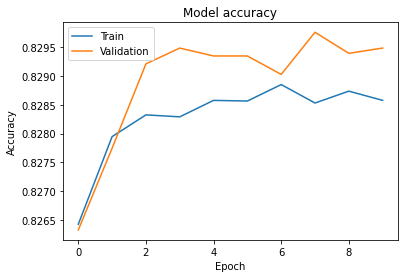

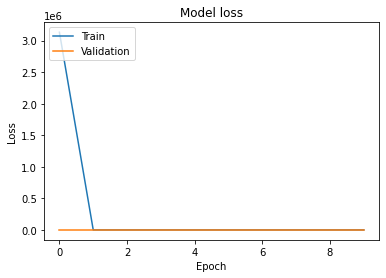

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Тут, так же, как и ранее можно увидеть что модель по графику переобучается! Но это опять же не так, потому что разница между графиком валидационной и тренировочной выборки очень мала, а это в свою очередь не явлется признаком переобучения. 

## **GRU**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(GRU(64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [ ]:
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
685/685 [==============================] - 6s 6ms/step - loss: 0.2965 - accuracy: 0.9189 - val_loss: 0.1696 - val_accuracy: 0.9523
Epoch 2/10
685/685 [==============================] - 7s 11ms/step - loss: 0.1723 - accuracy: 0.9521 - val_loss: 0.1328 - val_accuracy: 0.9607
Epoch 3/10
685/685 [==============================] - 4s 6ms/step - loss: 0.1440 - accuracy: 0.9595 - val_loss: 0.1182 - val_accuracy: 0.9662
Epoch 4/10
685/685 [==============================] - 4s 6ms/step - loss: 0.1313 - accuracy: 0.9636 - val_loss: 0.1107 - val_accuracy: 0.9689
Epoch 5/10
685/685 [==============================] - 6s 9ms/step - loss: 0.1201 - accuracy: 0.9661 - val_loss: 0.1100 - val_accuracy: 0.9691
Epoch 6/10
685/685 [==============================] - 4s 6ms/step - loss: 0.1135 - accuracy: 0.9683 - val_loss: 0.1043 - val_accuracy: 0.9721
Epoch 7/10
685/685 [==============================] - 4s 6ms/step - loss: 0.1085 - accuracy: 0.9695 - val_loss: 0.1025 - val_accuracy: 0.9730
Epoch

In [ ]:
model.save('my_model_GRU.h5')

score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

685/685 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9752
Test loss: 0.09381480515003204
Test accuracy: 0.9751964211463928


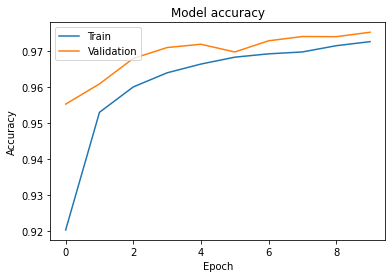

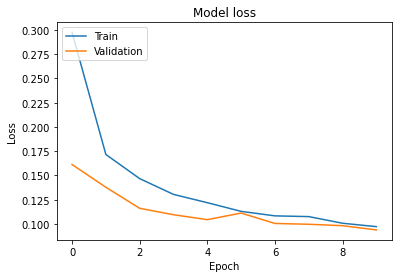

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Данная модель оптимальнее всего подходит для нашей выборки, если бы нужно было выбрать одну, то я бы выбрал именно ее. Графики точно это показывают!

## **Вывод**

1) GRU является наилучшей моделью среди рассмотренных, так как она показала наилучшее качество предсказания на тестовой выборке. Это может быть связано с тем, что GRU обладает промежуточной сложностью между обычной рекуррентной сетью и LSTM.

2) Обычная рекуррентная сеть заняла второе место по качеству, что говорит о том, что она также является хорошей моделью для решения задачи классификации электрокардиограмм. Однако она может быть менее эффективной, чем более сложные модели, когда данные имеют более сложную структуру.

3) LSTM, несмотря на свою популярность и широкое применение в различных задачах, показала наихудшее качество среди рассмотренных моделей. Это может быть связано с тем, что LSTM имеет более сложную архитектуру, чем GRU, и может потребовать большего количества данных и времени для обучения. Также возможно, что в данной конкретной задаче LSTM не смогла полностью раскрыть свой потенциал и использование других методов оптимизации и архитектурных изменений может улучшить ее качество.